## Problem Statement

To automate the data labelling of URLs into Malicious or Benign using Active Learning

## Data Overview

Taken data from kaggle https://www.kaggle.com/datasets/siddharthkumar25/malicious-and-benign-urls?resource=download

The dataset was acquired from various sources such as PhisTank etc.

#### Anatomy of URL

URLs allow Internet users to navigate from one website to another. They comprehensively represent access to content that it is stored in servers, somewhere in the world. The URLs are accessible by a simple click on a link, image … or simply by writing it via our browsers.

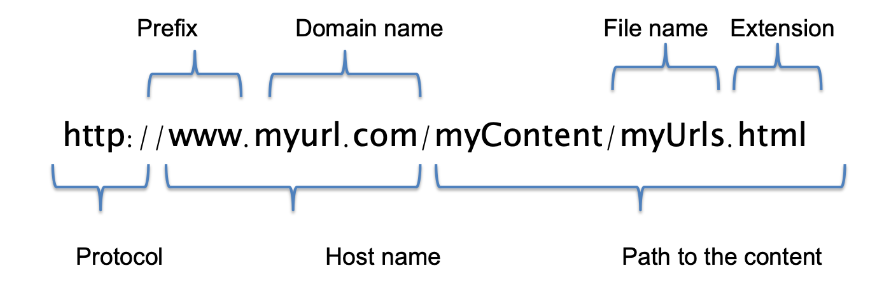

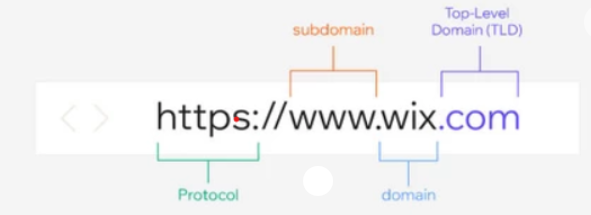

In [1]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns



Bad key text.latex.unicode in file C:\Users\megha\anaconda3\envs\diploma\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\megha\anaconda3\envs\diploma\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\megha\anaconda3\envs\diploma\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc fi

In [2]:
# importing dataset
df = pd.read_csv('urldata.csv')

In [3]:
df.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [4]:
#Removing the unnamed columns as it is not necesary.
urldata = df.drop('Unnamed: 0',axis=1)

In [5]:
urldata.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [6]:
urldata.shape

(450176, 3)

The dataset has:
- 450176 rows
- 3 columns

In [7]:
# Basic data check
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   label   450176 non-null  object
 2   result  450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


In [8]:
# checking for missing values
urldata.isnull().sum()

url       0
label     0
result    0
dtype: int64

There are no missing values

## Feature Engineering

The following features will be extracted from the URL for classification.

1. Length Features:
   - Length Of Url
   - Length of Hostname
   - Length Of Path
   - Length Of First Directory
   - Length Of Top Level Domain
   
2. Count Features:
   - Count Of '-'
   - Count Of '@'
   - Count Of '?'
   - Count Of '%'
   - Count Of '.'
   - Count Of '='
   - Count Of 'http'
   - Count of 'https'
   - Count Of 'www'
   - Count Of Digits
   - Count Of Letters
   - Count Of Number Of Directories

3. Binary Features:
   - Use of IP or not
   - Use of Shortening URL or not

We will make use of Top Level Domain (TLD) to recognize certain elements of a website, such as its purpose, owner or geographical area. For example, a .edu top-level domain allows users to immediately identify that site as a higher educational institution.

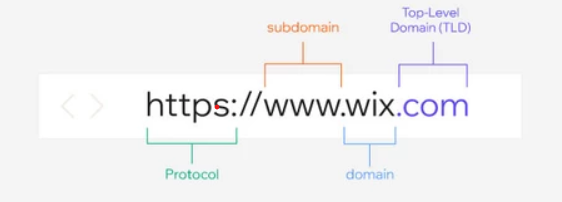

#### 1. Length features

In [9]:
from urllib.parse import urlparse
from tld import get_tld
import os.path

In [10]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

In [11]:
#hostname length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [12]:
urldata.head()

,url,label,result,url_length,hostname_length
0,https://www.google.com,benign,0,22,14
1,https://www.youtube.com,benign,0,23,15
2,https://www.facebook.com,benign,0,24,16
3,https://www.baidu.com,benign,0,21,13
4,https://www.wikipedia.org,benign,0,25,17


#### 2. Count features

In [14]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))

In [15]:
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))

In [13]:
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))

In [16]:
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [17]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [18]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [19]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

Data after extracting Count Features

In [20]:
urldata.head()

,url,label,result,url_length,hostname_length,count-https,count-,count@,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,14,1,0,0,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,1,0,0,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,1,0,0,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,1,0,0,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,1,0,0,1,0,20,0


In [21]:
label = urldata['result']

In [22]:
# dropping tld column since we only need tld_length
urldata = urldata.drop("label",1)
urldata = urldata.drop("result",1)

In [23]:
urldata.head()

,url,url_length,hostname_length,count-https,count-,count@,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,22,14,1,0,0,1,0,17,0
1,https://www.youtube.com,23,15,1,0,0,1,0,18,0
2,https://www.facebook.com,24,16,1,0,0,1,0,19,0
3,https://www.baidu.com,21,13,1,0,0,1,0,16,0
4,https://www.wikipedia.org,25,17,1,0,0,1,0,20,0


In [24]:
urldata['label']=label

In [25]:
urldata.head()

,url,url_length,hostname_length,count-https,count-,count@,count-www,count-digits,count-letters,count_dir,label
0,https://www.google.com,22,14,1,0,0,1,0,17,0,0
1,https://www.youtube.com,23,15,1,0,0,1,0,18,0,0
2,https://www.facebook.com,24,16,1,0,0,1,0,19,0,0
3,https://www.baidu.com,21,13,1,0,0,1,0,16,0,0
4,https://www.wikipedia.org,25,17,1,0,0,1,0,20,0,0


In [27]:
urldata.to_csv('data/complete_data.csv',index=False)

In [118]:
data = pd.read_csv("data1.csv")

In [119]:
data.head()

,url,url_length,hostname_length,count-https,count-,count@,count-www,count-digits,count-letters,count_dir,label
0,https://www.google.com,22,14,1,0,0,1,0,17,0,0
1,http://gangainsulations.com/alert/GD/,37,20,0,0,0,0,0,30,3,1
2,https://www.facebook.com,24,16,1,0,0,1,0,19,0,0
3,https://www.baidu.com,21,13,1,0,0,1,0,16,0,0
4,https://www.wikipedia.org,25,17,1,0,0,1,0,20,0,0


In [120]:
data.tail()

,url,url_length,hostname_length,count-https,count-,count@,count-www,count-digits,count-letters,count_dir,label
5,http://faboleena.com/js/infortis/jquery/plugin...,159,13,0,0,0,0,21,118,12,1
6,http://faboleena.com/js/infortis/jquery/plugin...,147,13,0,0,0,0,20,109,12,1
7,https://www.google.co.in,24,16,1,0,0,1,0,18,0,0
8,https://www.qq.com,18,10,1,0,0,1,0,13,0,0
9,https://www.amazon.com,22,14,1,0,0,1,0,17,0,0


In [121]:
data = data.drop("url",1)

In [122]:
data.head()

,url_length,hostname_length,count-https,count-,count@,count-www,count-digits,count-letters,count_dir,label
0,22,14,1,0,0,1,0,17,0,0
1,37,20,0,0,0,0,0,30,3,1
2,24,16,1,0,0,1,0,19,0,0
3,21,13,1,0,0,1,0,16,0,0
4,25,17,1,0,0,1,0,20,0,0


In [123]:
Y = data['label']
X = data.drop('label', axis=1)

In [124]:
# Importing
from sklearn.linear_model import LogisticRegression

In [125]:
log_model = LogisticRegression(warm_start=True)
log_model.fit(X,Y)

LogisticRegression(warm_start=True)

In [126]:
import pickle

pickle.dump(log_model, open('LR_model.pkl', 'wb'))

In [111]:
data2 = pd.read_csv("data for upload/data2.csv")

In [112]:
data2.head()

,url,url_length,hostname_length,count-https,count-,count@,count-www,count-digits,count-letters,count_dir,label
0,https://insidethestorex.com/sd/,31,19,1,0,0,0,0,25,2,1
1,https://www.360.cn,18,10,1,0,0,1,3,10,0,0
2,https://www.google.de,21,13,1,0,0,1,0,16,0,0
3,https://www.google.co.uk,24,16,1,0,0,1,0,18,0,0
4,http://youthsocialcircle.com/docs/Womsdhgdfhds...,154,21,0,0,0,0,0,147,3,1


In [113]:
y_test = data2['label']
x_test = data2.drop('label',axis=1)
x_test = x_test.drop('url',axis=1)

In [114]:
x_test.head()

,url_length,hostname_length,count-https,count-,count@,count-www,count-digits,count-letters,count_dir
0,31,19,1,0,0,0,0,25,2
1,18,10,1,0,0,1,3,10,0
2,21,13,1,0,0,1,0,16,0
3,24,16,1,0,0,1,0,18,0
4,154,21,0,0,0,0,0,147,3


In [115]:
log_predictions = log_model.predict(x_test)
log_prob = log_model.predict_proba(x_test)
print(x_test, log_predictions, log_prob)

    url_length  hostname_length  count-https  count-  count@  count-www  \
0           31               19            1       0       0          0   
1           18               10            1       0       0          1   
2           21               13            1       0       0          1   
3           24               16            1       0       0          1   
4          154               21            0       0       0          0   
5           78               22            0       0       0          0   
6           21               13            1       0       0          1   
7           23               15            1       0       0          1   
8           45               18            0       0       0          1   
9           47               37            0       0       0          0   
10          24               16            1       0       0          1   
11          21               13            1       0       0          1   
12          21           

In [116]:
log_model.decision_function(x_test)

array([ 0.90047798, -3.77254499, -2.97360056, -2.80303026, 37.62510462,
       13.83222057, -2.97360056, -2.74862713,  5.23568741,  2.87196439,
       -2.63614041, -2.97360056, -2.97360056,  2.06782405, -2.69054354,
       -2.74862713, -2.97360056,  5.77837483,  9.16265776, 15.04486375])

In [117]:
log_model.score(x_test, y_test)

1.0

In [64]:
log_model.classes_

array([0, 1], dtype=int64)

In [66]:
len(log_prob)

20

In [67]:
log_prob[0][1]

0.7110477168485233

In [68]:
log_prob[1][0]

0.9775233457848199

In [69]:
from sklearn.linear_model import SGDClassifier

In [96]:
clf = SGDClassifier(loss='log', warm_start=True, alpha=0.0001, l1_ratio=0.09, penalty='elasticnet')

In [97]:
clf.fit(X,Y)

SGDClassifier(l1_ratio=0.09, loss='log', penalty='elasticnet', warm_start=True)

In [79]:
import pickle

pickle.dump(clf, open('SGD_classifier.pkl', 'wb'))

In [88]:
sgd_params = {
    'loss':['log'],
    'penalty':['elasticnet'],
    'alpha':np.logspace(-4, 4, 10),
    'l1_ratio':[0.05,0.06,0.07,0.08,0.09,0.1,0.12,0.13,0.14,0.15,0.2]
}

In [85]:
from sklearn.model_selection import GridSearchCV

In [89]:
sgd_gs = GridSearchCV(clf, sgd_params, cv=5, verbose=1, n_jobs=1)

In [90]:
sgd_gs.fit(X,Y)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


GridSearchCV(cv=5, estimator=SGDClassifier(loss='log', warm_start=True),
             n_jobs=1,
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'l1_ratio': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12,
                                      0.13, 0.14, 0.15, 0.2],
                         'loss': ['log'], 'penalty': ['elasticnet']},
             verbose=1)

In [92]:
sgd_gs.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.09, 'loss': 'log', 'penalty': 'elasticnet'}

In [98]:
sgd_predictions = clf.predict(x_test)
sgd_prob = clf.predict_proba(x_test)

In [99]:
print(x_test, sgd_predictions, sgd_prob)

    url_length  hostname_length  count-https  count-  count@  count-www  \
0           31               19            1       0       0          0   
1           18               10            1       0       0          1   
2           21               13            1       0       0          1   
3           24               16            1       0       0          1   
4          154               21            0       0       0          0   
5           78               22            0       0       0          0   
6           21               13            1       0       0          1   
7           23               15            1       0       0          1   
8           45               18            0       0       0          1   
9           47               37            0       0       0          0   
10          24               16            1       0       0          1   
11          21               13            1       0       0          1   
12          21           

In [100]:
clf.score(x_test, y_test)

0.8

In [101]:
sgd_prob[0][1]

0.0